In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
df_customers = pd.read_csv('customers.csv')
df_date = pd.read_csv('date.csv')
df_markets = pd.read_csv('markets.csv')
df_products = pd.read_csv('products.csv')
df_transactions = pd.read_csv('transactions.csv')

### Checking for NULL values

In [4]:
df_date.isnull().sum()

date           0
cy_date        0
year           0
month_name     0
date_yy_mmm    0
dtype: int64

In [5]:
df_products.isnull().sum()

product_code    0
product_type    0
dtype: int64

In [6]:
df_transactions.isnull().sum()

product_code     0
customer_code    0
market_code      0
order_date       0
sales_qty        0
sales_amount     0
currency         0
dtype: int64

In [7]:
df_markets.isnull().sum()

markets_code    0
markets_name    0
zone            2
dtype: int64

In [8]:
df_markets.loc[df_markets['zone'].isnull()]

,markets_code,markets_name,zone
15,Mark097,New York,NaN
16,Mark999,Paris,NaN


df_markets have Null values in the Zone Column. The markets "New York" & "Paris" are outliers. So the records are dropped.

In [9]:
# DROPPING NULL VALUES:
df_markets = df_markets.dropna()

In [10]:
df_markets.loc[df_markets['zone'].isnull()]

,markets_code,markets_name,zone


### Checking for Duplicates

In [11]:
df_markets.markets_code.duplicated().sum()

0

In [12]:
df_customers.customer_code.duplicated().sum()

0

In [13]:
df_products.product_code.duplicated().sum()

0

In [14]:
df_products.product_code.duplicated().sum()

0

### Removing transactions with Sales Amount = 0 or 1

In [15]:
df_transactions.shape

(1000, 7)

In [16]:
transaction_errors_index = df_transactions[(df_transactions['sales_amount'] == 0) | (df_transactions['sales_amount'] == -1)].index
df_transactions.drop(transaction_errors_index, inplace = True)


In [17]:
df_transactions[(df_transactions['sales_amount'] == 0) | (df_transactions['sales_amount'] == -1)]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency


### Converting USD to INR

In [18]:
df_transactions['currency'].value_counts()

INR\r    712
INR      275
USD        2
USD\r      2
Name: currency, dtype: int64

In [19]:
df_transactions[(df_transactions['currency'] == "USD") | (df_transactions['currency'] == "USD\r") ]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
5,Prod003,Cus005,Mark004,2017-11-20,59,500,USD
6,Prod003,Cus005,Mark004,2017-11-22,36,250,USD
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r
287,Prod003,Cus005,Mark004,2017-11-22,36,250,USD\r


In [20]:
df_transactions[(df_transactions['currency'] == "INR") | (df_transactions['currency'] == "INR\r") ].head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency
0,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR
2,Prod002,Cus003,Mark003,2018-04-06,1,875,INR
3,Prod002,Cus003,Mark003,2018-04-11,1,583,INR
4,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR
7,Prod003,Cus005,Mark004,2017-11-23,39,21412,INR


Records with ['currency'] == "INR" and "USD" are duplciated.

##### i) Removing  Duplicate Records:

In [21]:
df_transactions.shape

(991, 7)

In [22]:
drop_indexes = df_transactions[(df_transactions['currency'] == "USD") | (df_transactions['currency'] == "INR")].index
df_transactions.drop(drop_indexes, inplace = True)

In [23]:
df_transactions.shape

(714, 7)

##### ii) Converting currency:

In [24]:
dict_covert = {}

key1 = "USD\r"
key2 = "INR\r"
    
dict_covert[key1] = 75
dict_covert[key2] = 1


dict_covert 


{'USD\r': 75, 'INR\r': 1}

In [25]:
df_transactions['converter'] = df_transactions['currency'].map(dict_covert)
df_transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter
281,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,1
283,Prod002,Cus003,Mark003,2018-04-06,1,875,INR\r,1
284,Prod002,Cus003,Mark003,2018-04-11,1,583,INR\r,1
285,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR\r,1
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r,75


In [26]:
df_transactions['norm_sales_amount'] = df_transactions['sales_amount'] * df_transactions['converter']
df_transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount
281,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,1,41241
283,Prod002,Cus003,Mark003,2018-04-06,1,875,INR\r,1,875
284,Prod002,Cus003,Mark003,2018-04-11,1,583,INR\r,1,583
285,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR\r,1,7176
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r,75,37500


##### 1) Transactions from Chennai

In [27]:
df_transactions[df_transactions['market_code'] == "Mark001"]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount
281,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,1,41241
554,Prod013,Cus001,Mark001,2017-10-10,240,143560,INR\r,1,143560
588,Prod016,Cus001,Mark001,2018-06-28,187,115481,INR\r,1,115481


##### 2) Transactions done in USD Currency

In [28]:
df_transactions['currency'].value_counts()

INR\r    712
USD\r      2
Name: currency, dtype: int64

In [29]:
df_transactions.loc[df_transactions['currency'] == 'USD\r']

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r,75,37500
287,Prod003,Cus005,Mark004,2017-11-22,36,250,USD\r,75,18750


##### 3) Transactions done in year 2020

In [30]:
## Adding year column & month column
df_transactions['year'] = df_transactions['order_date'].str[0:4]
df_transactions['year'] = df_transactions['year'].astype(int)



In [31]:
df_transactions['month'] = df_transactions['order_date'].str[5:7].astype(int)
df_transactions.head()

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount,year,month
281,Prod001,Cus001,Mark001,2017-10-10,100,41241,INR\r,1,41241,2017,10
283,Prod002,Cus003,Mark003,2018-04-06,1,875,INR\r,1,875,2018,4
284,Prod002,Cus003,Mark003,2018-04-11,1,583,INR\r,1,583,2018,4
285,Prod002,Cus004,Mark003,2018-06-18,6,7176,INR\r,1,7176,2018,6
286,Prod003,Cus005,Mark004,2017-11-20,59,500,USD\r,75,37500,2017,11


In [32]:
df_transactions[df_transactions['year'] == 2020]

,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount,year,month
381,Prod005,Cus007,Mark004,2020-01-09,1,630,INR\r,1,630,2020,1
382,Prod005,Cus007,Mark004,2020-01-10,1,472,INR\r,1,472,2020,1
383,Prod005,Cus007,Mark004,2020-01-17,2,2042,INR\r,1,2042,2020,1
384,Prod005,Cus007,Mark004,2020-02-07,1,417,INR\r,1,417,2020,2
385,Prod005,Cus007,Mark004,2020-02-14,1,310,INR\r,1,310,2020,2
386,Prod005,Cus007,Mark004,2020-02-28,1,208,INR\r,1,208,2020,2
387,Prod005,Cus007,Mark004,2020-03-06,1,620,INR\r,1,620,2020,3
388,Prod005,Cus007,Mark004,2020-03-13,1,620,INR\r,1,620,2020,3
389,Prod005,Cus007,Mark004,2020-04-03,1,829,INR\r,1,829,2020,4
390,Prod005,Cus007,Mark004,2020-04-14,4,2694,INR\r,1,2694,2020,4


##### 3) Revenue generated in year 2020

In [33]:
df_transaction_2020 = df_transactions[df_transactions['year'] == 2020]

In [34]:
df_transaction_2020['norm_sales_amount'].sum()

11014

In [35]:
print("Revenue generated in year 2020: ",df_transaction_2020.norm_sales_amount.sum())

Revenue generated in year 2020:  11014


##### 4) Revenue obtained from businesses in Delhi during 2020:

In [36]:
delhi_transaction_2020 = df_transactions[(df_transactions['year'] == 2020) & (df_transactions['market_code'] == 'Mark004')]['norm_sales_amount'].sum()
print(" Revenue obtained from businesses in Delhi during 2020: ", delhi_transaction_2020)

 Revenue obtained from businesses in Delhi during 2020:  9472


##### 5) Sales yearwise:

In [37]:
df_transactions.groupby(['year'])[['norm_sales_amount']].sum()

,norm_sales_amount
year,
2017,1142610
2018,7065689
2019,2863358
2020,11014


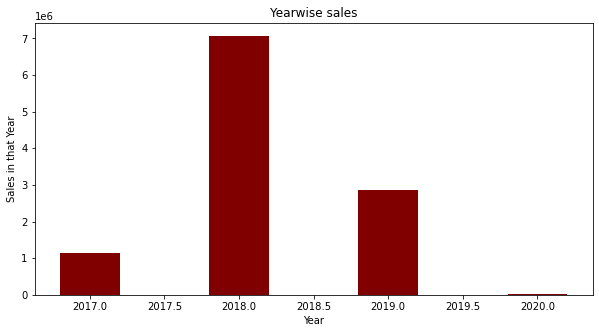

In [38]:
df_yearwise = df_transactions.groupby(['year']).sum('norm_sales_amount')


year = list(df_yearwise.index)
sales = list(df_yearwise['norm_sales_amount'])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, sales, color ='maroon',
        width = 0.4)
 
plt.xlabel("Year")
plt.ylabel("Sales in that Year")
plt.title("Yearwise sales")
plt.show()


##### 6) Top 5 Customers:

In [39]:
df_cust_trans = df_transactions.merge(df_customers, left_on = 'customer_code', right_on='customer_code')

In [40]:
df_cust_trans.groupby('custmer_name')[['norm_sales_amount']].sum().sort_values(by = 'norm_sales_amount', ascending = False).head(5)

,norm_sales_amount
custmer_name,
Electricalslytical,2289335
Path,1883686
Electricalsara Stores,1787000
Logic Stores,1756308
Info Stores,707270


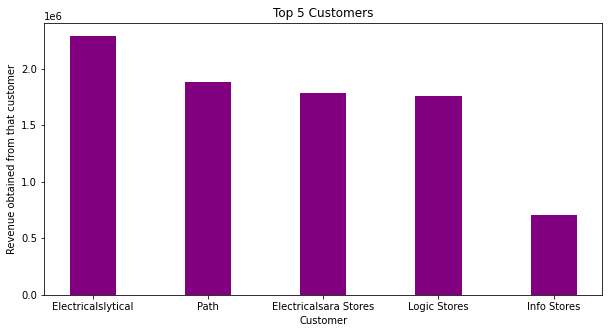

In [41]:
df_top_cust = df_cust_trans.groupby('custmer_name').sum('norm_sales_amount').sort_values(by = 'norm_sales_amount', ascending = False).head(5)

customers = list(df_top_cust.index)
sales = list(df_top_cust['norm_sales_amount'])
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(customers, sales, color ='purple',
        width = 0.4)
 
plt.xlabel("Customer")
plt.ylabel("Revenue obtained from that customer")
plt.title("Top 5 Customers")
plt.show()


##### 7) Sales Zone wise

In [42]:
df_mark_trans = df_transactions.merge(df_markets, left_on = 'market_code', right_on='markets_code')

In [43]:
df_mark_trans.groupby('zone')[['norm_sales_amount']].sum()

,norm_sales_amount
zone,
Central,6487941
North,4294448
South,300282


#### 8) 10 customers with lowest Transactions in North Zone:

In [44]:
df_cust_mark_trans = df_cust_trans.merge(df_markets, left_on = 'market_code', right_on = 'markets_code')

In [45]:
print("10 customers with lowest Transactions in North Zone: ")
df_cust_north = df_cust_mark_trans[df_cust_mark_trans['zone'] == 'North']
df_cust_north.groupby('custmer_name')[["norm_sales_amount"]].sum().sort_values(by = 'norm_sales_amount', ascending = True).head(10)

10 customers with lowest Transactions in North Zone: 


,norm_sales_amount
custmer_name,
Acclaimed Stores,1314
Surface Stores,7176
Integration Stores,13992
Unity Stores,29635
Nixon,31069
Atlas Stores,50090
Forward Stores,53044
Excel Stores,59665
Insight,105333


#### 9) Customer in Central Zone with transaction below than avergae transaction in Central zone:

In [46]:
df_cust_central = df_cust_mark_trans[df_cust_mark_trans['zone'] == 'Central']

In [52]:
avg_sales_central = df_cust_central['norm_sales_amount'].mean()

print('Customers in Central Zone with transaction below than avergae transaction in Central zone')
df_cust_central[df_cust_central['norm_sales_amount'] < avg_sales_central].head()

Customers in Central Zone with transaction below than avergae transaction in Central zone


,product_code,customer_code,market_code,order_date,sales_qty,sales_amount,currency,converter,norm_sales_amount,year,month,custmer_name,customer_type,markets_code,markets_name,zone
326,Prod009,Cus009,Mark002,2018-11-14,3,3032,INR\r,1,3032,2018,11,Electricalsquipo Stores,Brick & Mortar,Mark002,Mumbai,Central
327,Prod011,Cus016,Mark002,2017-10-06,1,505,INR\r,1,505,2017,10,Logic Stores,Brick & Mortar,Mark002,Mumbai,Central
328,Prod011,Cus016,Mark002,2017-10-13,1,1514,INR\r,1,1514,2017,10,Logic Stores,Brick & Mortar,Mark002,Mumbai,Central
329,Prod011,Cus016,Mark002,2017-10-20,1,2023,INR\r,1,2023,2017,10,Logic Stores,Brick & Mortar,Mark002,Mumbai,Central
331,Prod011,Cus016,Mark002,2018-02-08,1,593,INR\r,1,593,2018,2,Logic Stores,Brick & Mortar,Mark002,Mumbai,Central


#### 10) SalesTrend in 2019

In [49]:
df_2019_trans = df_transactions[df_transactions['year'] == 2019]

In [50]:
df_2019_trans.groupby('month')[['norm_sales_amount']].sum()

,norm_sales_amount
month,
1,981598
2,723158
3,148213
4,3000
5,167157
6,80193
7,365755
8,28168
9,277885


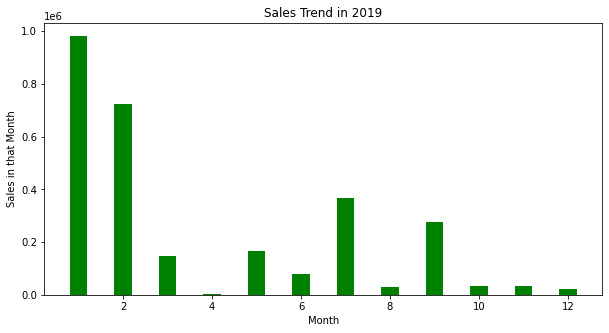

In [51]:
df_2019_month_wise = df_2019_trans.groupby('month')[['norm_sales_amount']].sum()

month = list(df_2019_month_wise.index)
sales = list(df_2019_month_wise['norm_sales_amount'])
  


year = list(df_2019_month_wise.index)
sales = list(df_2019_month_wise['norm_sales_amount'])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(year, sales, color ='green',
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Sales in that Month")
plt.title("Sales Trend in 2019")
plt.show()

